#Data Analysis with Python, IBM.

##Módulo 4

###Alejandro García Hernández

###A01793812

En este módulo se introduce el concepto de modelo. Un modelo o estimador es  una ecuación matemática utilizada para predecir un valor dado a partir de otro(s) valor(es), es decir, relacionar una o más variables o características independientes con variables dependientes. Algo a tener en consideración que que, generalmente, entre más datos relevantes se tenga, más preciso será el modelo.

# Regresión líneal simple y Múltiple
La regresión lineal simple (SLR) es un método que nos ayuda a entender la relación entre dos variables: la variable predictora (independiente) X y la variable objetivo (dependiente) Y. La relación que busca este método es una relación lineal entre las variables antes mencionadas. Así, la ecuación que se desea resolver es de la forma:

y = b0 + b1*X

En donde el parámetro b0 es el intercepto y el parámetro b1 es la pendiente.

Para realizar los cálculos en Python, generalmente los datos se guardan en dos dataframes; i) el valor que nos gustaría predecir, se almacenamos en la matriz y, ii) la variable dependiente se almacena en la matriz X.

Con los valores de X el modelo se entrena para obtener los parámetros de la ecuación mencionada anteriormente y una vez obtenidos estos parámetros se pueden utilizar para predecir valores de y que no hemos visto a partir de nuevos valores de X.

Cada una de las estimaciones que genera el modelo con los datos de entrenamiento tienen diferencias, generalmente cercanas a cero, con respecto a las variables originales de y. Estas diferencias se conocen como errores, si los errores son pequeños el modelo es confiable y más exacto.

Cabe destacar que si se tiene más de una característica en la matriz X, el modelo estimará un parámetro por cada una de estas características.


In [28]:
#librerias necesarias

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression

from sklearn.pipeline import Pipeline

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [3]:
#se obtienen los datos

path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'

df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [4]:
#se generan los conjuntos X y Y
X = df[['highway-mpg']]
Y = df['price']

# se crea el objeto regresión lm
lm = LinearRegression()

#y se corre el modelo
lm.fit(X,Y)

#Ahora se puede obtener las predicciones de cada uno de los valores obtenidos con el modelo
Yhat = lm.predict(X)

#así como los valores del intercepto y b1
print("La ecuación queda resuelta de la siguiente manera: Y = ", round(lm.intercept_,2) ,round(lm.coef_[0],2) ,"*X")


La ecuación queda resuelta de la siguiente manera: Y =  38423.31 -821.73 *X


In [5]:
#Si tenemos más de una carácteristica la sintaxis es idéntica

Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
lm.fit(Z, Y)

#Ahora se puede obtener las predicciones de cada uno de los valores obtenidos con el modelo
Yhat = lm.predict(Z)

#solo que ahora tenemos 4 coeficientes, uno por cada una de las características del conjunto X

for i in range(0,lm.coef_.size):
  print("el valor de b",i+1, "es ",round(lm.coef_[i],2))



el valor de b 1 es  53.5
el valor de b 2 es  4.71
el valor de b 3 es  81.53
el valor de b 4 es  36.06


Una manera visual de evaluar el modelo es con una gráfica de regresión, en esta podremos ver la relación entre dos variables, que tan correlacionadas están y en que dirección. Otra gráfica importante es la de los residuos, está gráfica es importante porque debemos observar que están separados de manera aleatoria y no con algún patrón, lo cuál, indicaría que asumir una relación lineal es incorrecto. En general lo que se espera es que los residuos tengan media cero y varianza constante.

(0.0, 48167.82885177216)

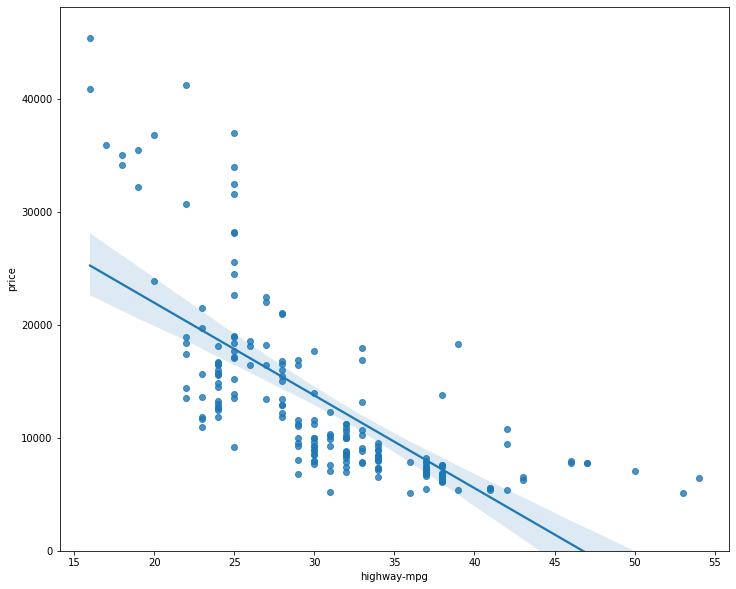

In [6]:
#se crea un objeto figure para 
plt.figure(figsize=(12, 10))

# y se crea la gráfica
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

Podemos observar que algunos valores están muy alejados de la línea que se construye a partir de la ecuación estimada por el modelo, así que es importante ver la gráfica de residuos

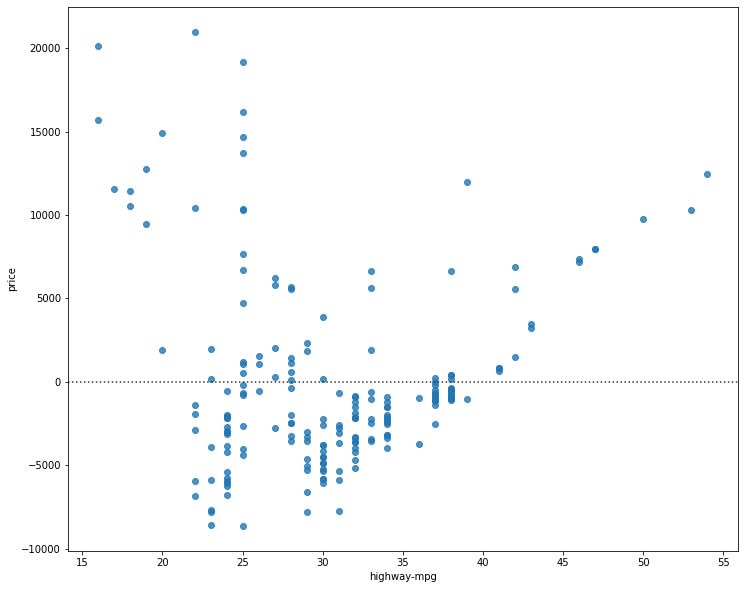

In [7]:
plt.figure(figsize=(12, 10))
sns.residplot(x=df['highway-mpg'],y=df['price'])
plt.show()

En esta gráfica se observa que la varianza no es constante.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


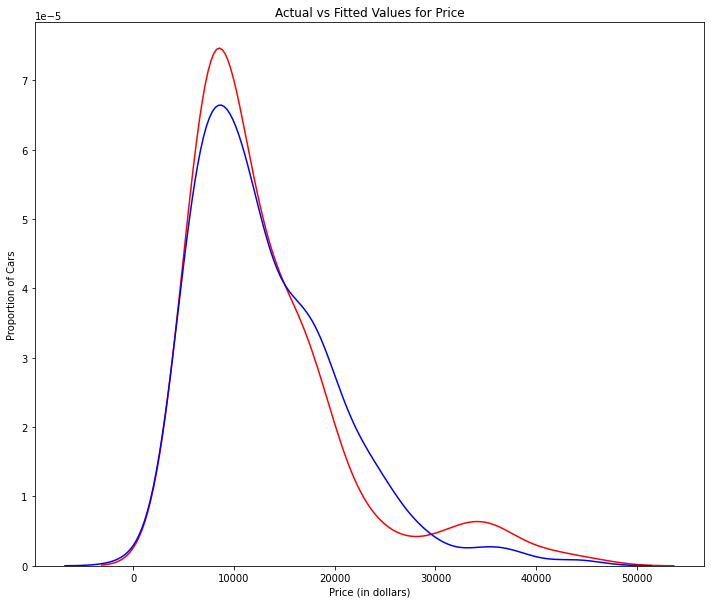

In [8]:
#Si se tiene más de una característica, es decir una regresión lineal múltiple, entonces se puede graficar una distribución de la siguiente manera
plt.figure(figsize=(12,10))

Y_hat = lm.predict(Z)

ax1 = sns.distplot(Y, hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

En la distribución podemos ver que los valores son bastante parecidos, si bien es posible mejorar sobre todo en los autos con precios más altos.

# Regresión polinomial

Cuando la relación entre variables no es líneal si no más bien curvilinea, entonces tenemos que recurrrir a la regresión polinomial.

In [9]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [10]:
# para crear un modelo polinomial sencillo podemos usar la función polyfit de numpy
x = df['highway-mpg']
y = df['price']
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


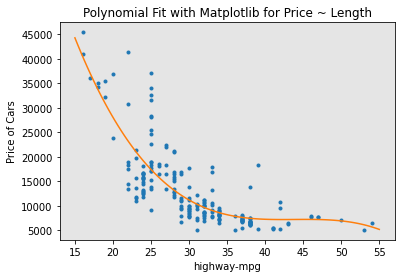

In [11]:
#En la gráfica se observa que esta relación polinómica ajusta mejor los datos que una línea.
PlotPolly(p, x, y, 'highway-mpg')

In [12]:
# si tenemos más de una característica, la transformación polinomial se realiza de la siguiente manera

#se genera el objeto PolynomialFeatures de grado 2
pr=PolynomialFeatures(degree=2)

#y se transforman los datos
Z_pr=pr.fit_transform(Z)

print(Z.shape)
print(Z_pr.shape)

#Se observa que en el conjunto Z había 4 características mientras que en el conjunto transformado ahora hay 15.

(201, 4)
(201, 15)


# Pipeline

Un Pipeline nos ayuda a simplificar los pasos de procesamiento. Para crearlo se define una lista de tuplas incluyendo el nombre del modelo o estimador y su constructor correspondiente.

In [13]:
#se define un modelo de regresión lineal, los datos se van a estandarizar y se define PolynomialFeatures
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

#se crea el Pipeline
pipe=Pipeline(Input)

#Para evitar mensajes de alerta de conversión que pueden aparecer como resultado cuando StandardScaler arroja float 
Z = Z.astype(float)

#Con el Pipeline se puede normalizar los datos, realizar una transformación y ajustar el modelo simultáneamente.
pipe.fit(Z,y)

#y finalmente obtenemos la predicción de los valores Y
ypipe=pipe.predict(Z)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


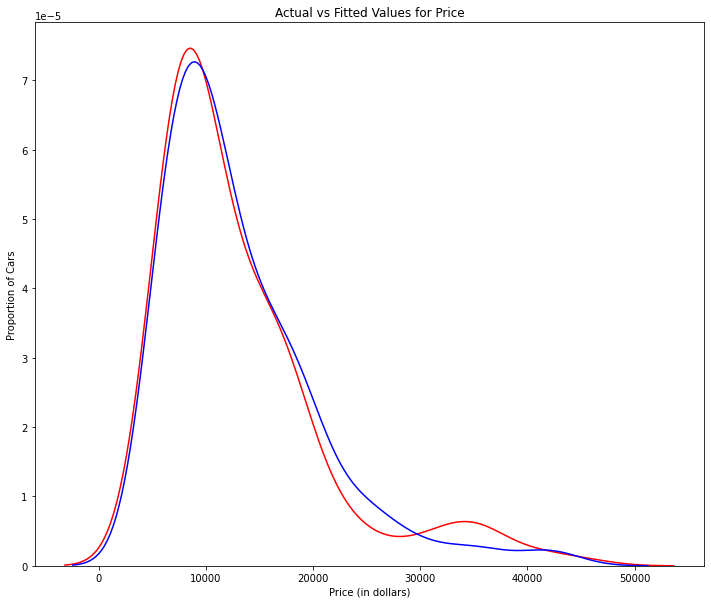

In [14]:
plt.figure(figsize=(12,10))

ax1 = sns.distplot(Y, hist=False, color="r", label="Actual Value")
sns.distplot(ypipe, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

Se observa que el modelo ajusta aún mejor que con la regresión lineal múltiple

Finalmente, existen siferentes métricas para evaluar nuestros modelos. Estas, son una forma numerica de determinar qué tan bien se ajusta el modelo a nuestros datos.
- Error cuadrático medio (MSE). Se refiere al promedio de los cuadrados de los errores (diferencia entre el valor real y y el pronosticado)
- R-cuadrada. A esta métrica también se le conoce como coeficiente de determinación. Es una medida para determinar qué tan cerca están los datos de la línea de regresión ajustada. Este resulta del cociente de la suma al cuadrado de la diferencia los datos estimados y el valor promedio de los datos originales entre, la suma al cuadrado de la diferencia los datos originales y el valor promedio de los datos. Lo que se busca es que los modelos tengan la R cuadrada más cercana a 1.



Finalmente en este módulo se muestra como se realizan las predicciones y la toma de decisión sobre los modelos.

In [19]:
#primero creamos nuevos datos para evaluar el modelo que se entrenó previamente
nuevos_datos=np.arange(1, 100, 1).reshape(-1, 1)

#recordamos el modelo que se entrenó con los datos de los conjuntos X y Y
lm.fit(X, Y)

#y se predicen los resultados para los nuevos datos
yhat=lm.predict(nuevos_datos)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


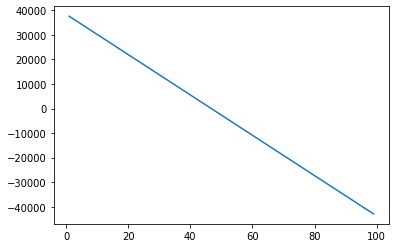

In [17]:
#Se grafican los resultados 
plt.plot(nuevos_datos, yhat)
plt.show()

Aunque existen valores negativos para los precios pronosticados, esto se debe al conjunto de datos que inventamos. Para saber que tan bien ajusta este modelo podemos calcular los valores de MSE y R cuadrada.


In [24]:
#para el modelo de regresión lineal simple en donde se pornostica el precio solo con highway_mpg_fit
lm.fit(X, Y)
Yhat = lm.predict(X)

mse = mean_squared_error(Y, Yhat)
print('El error cuadrado medio es: ', round(mse,3))
print('El valor de R-cuadrada es: ', round(lm.score(X, Y),3))

El error cuadrado medio es:  31635042.945
El valor de R-cuadrada es:  0.497


In [26]:
#para el modelo de regresión múltiple simple en donde se pornostica el precio solo con highway_mpg_fit
lm.fit(Z, Y)
Yhat = lm.predict(Z)

mse = mean_squared_error(Y, Yhat)
print('El error cuadrado medio es: ', round(mse,3))
print('El valor de R-cuadrada es: ', round(lm.score(Z, Y),3))

El error cuadrado medio es:  11980366.871
El valor de R-cuadrada es:  0.809


In [30]:
#Para el modelo polinomial
r_squared = r2_score(y, p(x))
mse=mean_squared_error(y, p(x))

print('El error cuadrado medio es: ', round(mse,3))
print('El valor de R-cuadrada es: ', round(r_squared,3))

El error cuadrado medio es:  20474146.426
El valor de R-cuadrada es:  0.674


Para tomar una decisión con respecto a qué modelo es el mejor hacemos uso de ambas medidas, MSE y R-cuadrada.

Primero si comparamos la regresión lineal simple vs la múltiple observamos que el valor del MSE es mucho más pequeño en el caso de la MLR, y por otro lado, el valor de R2 es más grande también en MSE por lo que se observa que en este caso MLR es mejor que SLR.

Ahora al comparar MLR vs la regresión polinomial, obtenemos que el MSE es más pequeño y la R2 es más grande en el MLR en comparación con la regresión polinomial.

Por lo anterior, en este caso la mejor opción sería la regresión lineal múltiple.

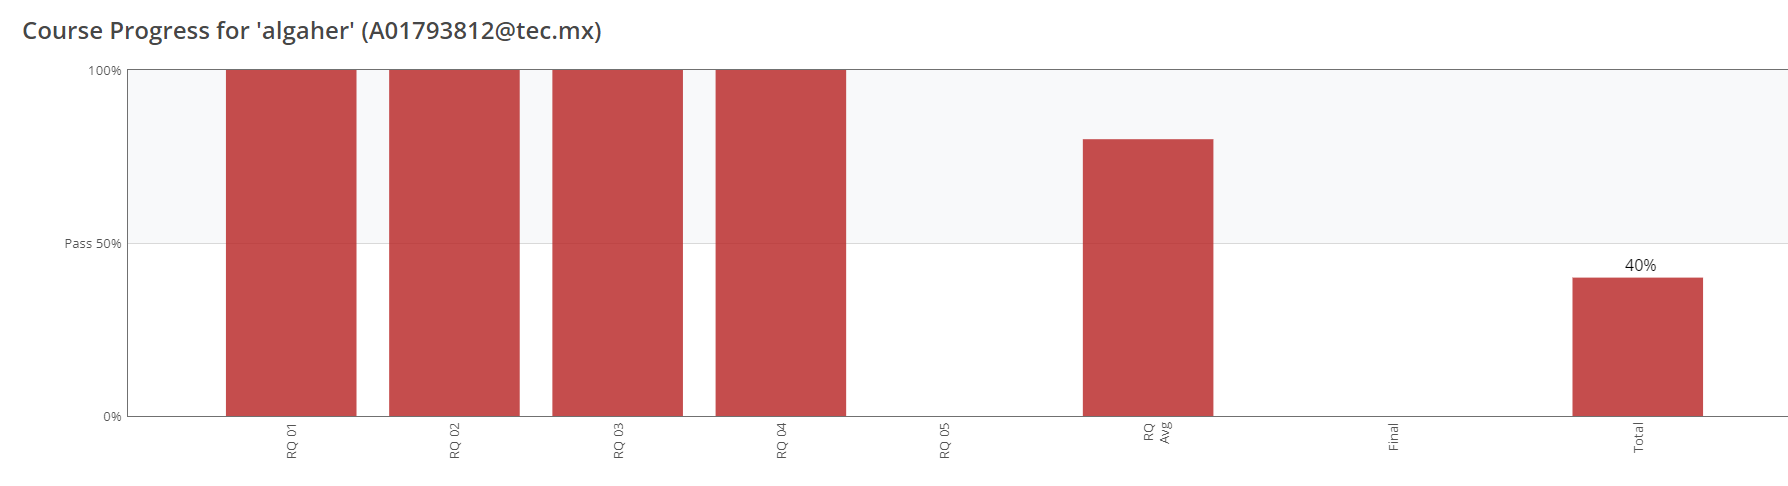